In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')
df2 = pd.read_csv('data_final1.csv')
# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [99]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

<b>Проверяем формат столбцов<b>

In [136]:
df['Date'] = pd.to_datetime(df['Дата'])
df.dtypes

Дата                    object
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
Date            datetime64[ns]
dtype: object

<b>Сразу переведем столбец "Дата" в правильный формат<b>

In [137]:
grouped_df = df.groupby('Date')['Количество'].sum()
print(grouped_df)

Date
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


<b>Сгруппируйте данные по дате, посчитайте количество продаж<b>

In [36]:
grouped_df.head()

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

<b>Вывести несколько первых строк сгруппированных данных<b>

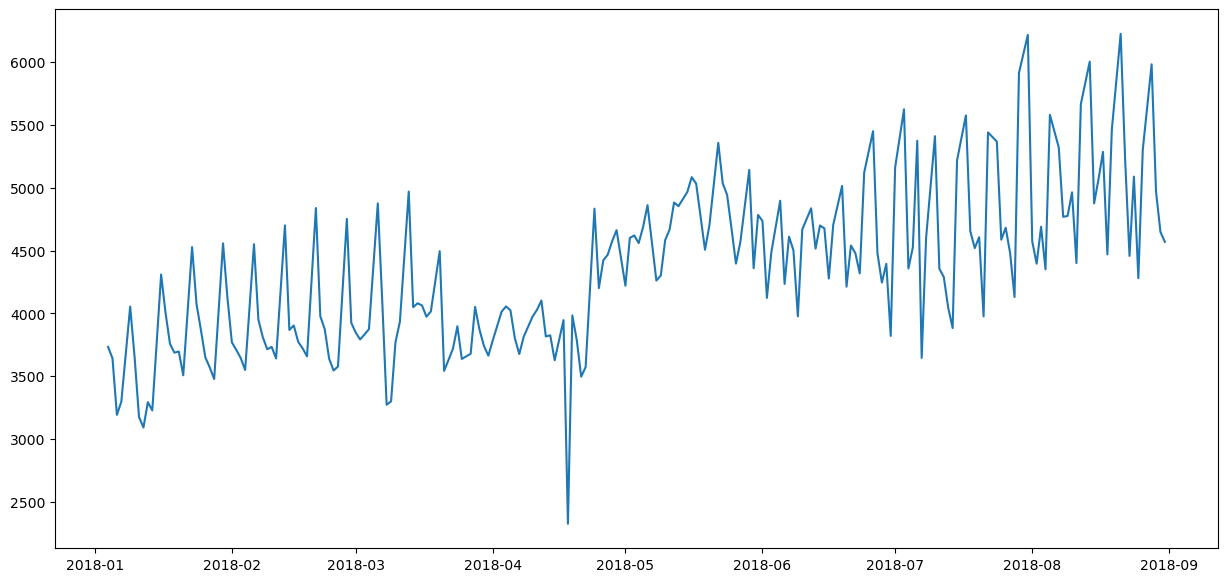

In [33]:
plt.figure(figsize=(15,7))
plt.plot(result)
plt.show()

<b>Нарисуйте график продаж у `grouped_df`<b>

На графике отображены данные за период с января по сентярь 2018 года. Мы видим большие колебания на протяжении всего периода.
С февраля по март обьем продаж сильно снижается, минимальные количество около 2500 продаж.
Максимальное количество продаж наблюдается с августа по сентябрь.

<b>Опишите что вы видите на графике. Ваша задача - максимально описать график<b>

In [44]:
max_quantity = df.loc[df['Количество'].idxmax()]
print(max_quantity)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


<b>Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)<b>

In [47]:
df['Месяц'] = df['Дата'].dt.month
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество  Месяц
0 2018-01-04      1  address_0    product_0           4      1
1 2018-01-04      1  address_0    product_1           4      1
2 2018-01-04      1  address_0    product_2           5      1
3 2018-01-04      1  address_0    product_3          10      1
4 2018-01-04      1  address_0    product_4           2      1


In [82]:
june_sales = df[(df['Месяц']==6) & (df['Склад'] == 3)]
max_quantity_june = june_sales.loc[june_sales['Количество'].idxmax()]
print(f"Топовый товар по продажам за июнь: {max_quantity_june['Номенклатура']}, Количество: {max_quantity_june['Количество']}")

july_sales = df[(df['Месяц']==7) & (df['Склад'] == 3)]
max_quantity_july = july_sales.loc[july_sales['Количество'].idxmax()]
print(f"\nТоповый товар по продажам за июль: {max_quantity_july['Номенклатура']}, Количество: {max_quantity_july['Количество']}")

august_sales = df[(df['Месяц']==7) & (df['Склад'] == 3)]
max_quantity_august = august_sales.loc[august_sales['Количество'].idxmax()]
print(f"\nТоповый товар по продажам за август: {max_quantity_august['Номенклатура']}, Количество: {max_quantity_august['Количество']}")


Топовый товар по продажам за июнь: product_0, Количество: 19

Топовый товар по продажам за июль: product_1, Количество: 19

Топовый товар по продажам за август: product_1, Количество: 19


<b>Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада<b>

In [127]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [128]:
df2.head()

,Date,t
0,2018-10-01,7.2
1,2018-10-01,8.5
2,2018-10-01,13.9
3,2018-10-01,15.8
4,2018-10-01,17.8


In [133]:
grouped_df2 = df2.groupby('Date').mean()
grouped_df2.head()

,t
Date,
2018-01-01,-9.4625
2018-01-02,-9.5125
2018-01-03,-11.4625
2018-01-04,-14.0750
2018-01-05,-16.8625


In [145]:
result = pd.merge(grouped_df, grouped_df2, on="Date").reset_index()
result.head()

,Date,Количество,t
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500


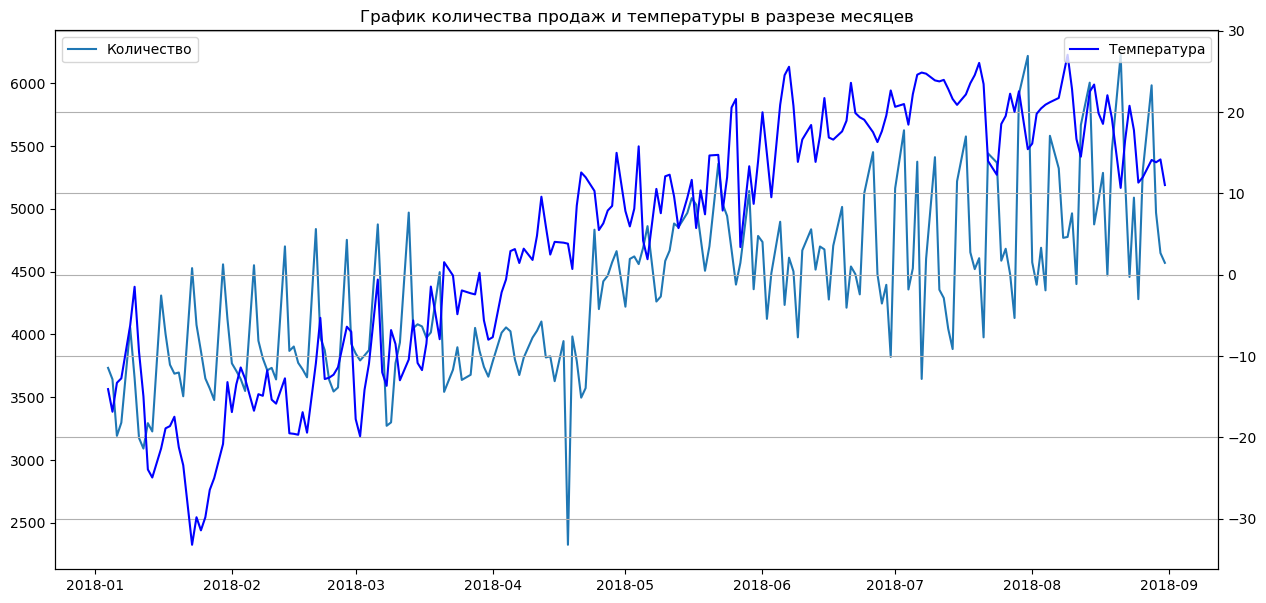

In [163]:
plt.figure(figsize=(15, 7))
plt.plot(result['Date'], result['Количество'], label="Количество")
plt.legend(loc="upper left")
ax2 = plt.twinx()
ax2.plot(result['Date'], result['t'], label='Температура', color='blue')
plt.grid()
ax2.legend(loc="upper right")
plt.title("График количества продаж и температуры в разрезе месяцев")
plt.show()

<b>Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.<b>

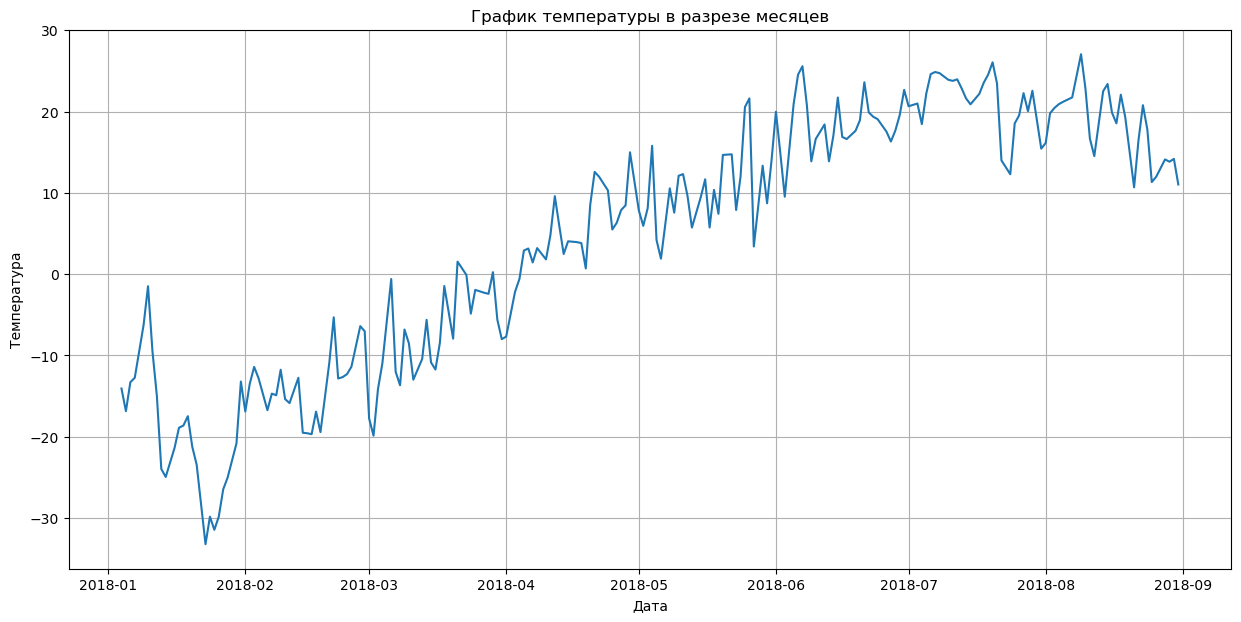

In [168]:
plt.figure(figsize=(15, 7))
plt.plot(result['Date'], result['t'])
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.title("График температуры в разрезе месяцев")
plt.grid()
plt.show()